https://github.com/LintangWisesa/Ujian_MachineLearning_JCDS03

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model

## **Soal 1 - Ploting**

Disediakan 1 buah dataset (file Excel) hasil sensus BPS (Badan Pusat Statistik) tentang jumlah penduduk Indonesia berdasarkan provinsi pada tahun 1971, 1980, 1990, 1995, 2000 & 2010. Unduh dataset via BPS: unduh di sini. Dilarang keras untuk menyunting/mengubah konten dataset! Kemudian dengan memanfaatkan dataset tersebut, selesaikanlah soal-soal berikut:

1. Buatlah sebuah file python (soal1_1.py) yang dapat menampilkan grafik: (1) jumlah penduduk Indonesia, (2) jumlah penduduk dari provinsi yang memiliki penduduk terbanyak di tahun 2010, dan (3) jumlah penduduk dari provinsi yang memiliki penduduk paling sedikit di tahun 1971!                         Provinsi dengan jumlah penduduk terbanyak di tahun 2010 adalah Jawa Barat, dan provinsi dengan jumlah penduduk paling sedikit di tahun 1971 adalah Bengkulu. Namun Anda dilarang untuk menuliskan kata "Jawa Barat", "Bengkulu" dan "Indonesia" di dalam script python Anda. Hasil yang diharapkan kurang lebih ditunjukkan oleh grafik berikut:

### Mengakses Data

In [10]:
df = pd.read_excel('data.xlsx', na_values=['-'], header=3, skipfooter=2)
df.rename(columns={'Unnamed: 0': 'Provinsi'}, inplace=True)
df

,Provinsi,1971,1980,1990,1995,2000,2010
0,Aceh,2008595.0,2611271.0,3416156.0,3847583.0,3930905.0,4494410
1,Sumatera Utara,6621831.0,8360894.0,10256027.0,11114667.0,11649655.0,12982204
2,Sumatera Barat,2793196.0,3406816.0,4000207.0,4323170.0,4248931.0,4846909
3,Riau,1641545.0,2168535.0,3303976.0,3900534.0,4957627.0,5538367
4,Jambi,1006084.0,1445994.0,2020568.0,2369959.0,2413846.0,3092265
5,Sumatera Selatan,3440573.0,4629801.0,6313074.0,7207545.0,6899675.0,7450394
6,Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518
7,Lampung,2777008.0,4624785.0,6017573.0,6657759.0,6741439.0,7608405
8,Kepulauan Bangka Belitung,NaN,NaN,NaN,NaN,900197.0,1223296
9,Kepulauan Riau,NaN,NaN,NaN,NaN,NaN,1679163


### Data Indonesia

In [11]:
df_Indo = df[33:34]
df_Indo

,Provinsi,1971,1980,1990,1995,2000,2010
33,INDONESIA,119208229.0,147490298.0,179378946.0,194754808.0,206264595.0,237641326


In [12]:
Data_Indo = []
for i in df_Indo.columns:
    x = list(df_Indo[i])
    for j in x:
        Data_Indo.append(j)

Data_Indo

['INDONESIA',
 119208229.0,
 147490298.0,
 179378946.0,
 194754808.0,
 206264595.0,
 237641326]

### Data Provinsi Penduduk Terbanyak

In [13]:
dt = pd.read_excel('data.xlsx', na_values=['-'], header=3, skipfooter=3)
dt.rename(columns={'Unnamed: 0': 'Provinsi'}, inplace=True)
MaxProv_2010 = dt[dt[2010] == dt[2010].max()]
MaxProv_2010

,Provinsi,1971,1980,1990,1995,2000,2010
11,Jawa Barat,21623529.0,27453525.0,35384352.0,39206787.0,35729537.0,43053732


In [14]:
Data_MaxProv = []
for i in MaxProv_2010.columns:
    x = list(MaxProv_2010[i])
    for j in x:
        Data_MaxProv.append(j)

Data_MaxProv

['Jawa Barat',
 21623529.0,
 27453525.0,
 35384352.0,
 39206787.0,
 35729537.0,
 43053732]

### Data Provinsi Penduduk Terkecil

In [15]:
MinProv_2010 = dt[dt[1971] == dt[1971].min()]
MinProv_2010

,Provinsi,1971,1980,1990,1995,2000,2010
6,Bengkulu,519316.0,768064.0,1179122.0,1409117.0,1567432.0,1715518


In [16]:
Data_MinProv = []
for i in MinProv_2010.columns:
    x = list(MinProv_2010[i])
    for j in x:
        Data_MinProv.append(j)

Data_MinProv

['Bengkulu', 519316.0, 768064.0, 1179122.0, 1409117.0, 1567432.0, 1715518]

### Menampilkan Grafik

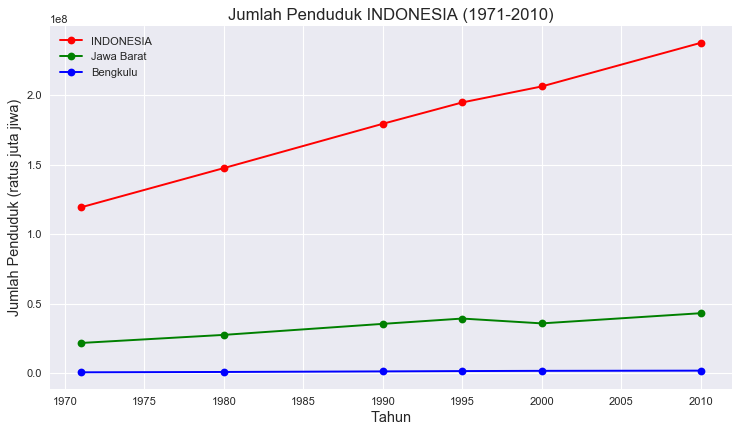

In [17]:
x = df_Indo.columns.tolist()[1:]
y1 = Data_Indo[1:]
y2 = Data_MaxProv[1:]
y3 = Data_MinProv[1:]

plt.style.use('seaborn')
plt.figure(figsize=(11,6), dpi=80)

plt.plot(x,y1,'ro-', x,y2,'go-', x,y3,'bo-')
plt.title('Jumlah Penduduk INDONESIA (1971-2010)', size='15') 
plt.xlabel('Tahun', size='13') 
plt.ylabel('Jumlah Penduduk (ratus juta jiwa)', size='13') 
plt.legend([Data_Indo[0], Data_MaxProv[0], Data_MinProv[0]], loc = 0)
plt.show()

## **Soal 2 - Linier Regression**

Buatlah sebuah file python (soal1_2.py) yang dapat melakukan regresi linear terhadap hasil di soal sebelumnya, untuk memprediksi jumlah penduduk di masa mendatang. (1) Gambarkan best fit line (garis terbaik) hasil regresi pada grafik, dan (2) prediksikan berapa jumlah penduduk Indonesia, Jawa Barat & Bengkulu pada tahun 2050!

Anda dilarang untuk menuliskan kata "Jawa Barat", "Bengkulu" dan "Indonesia" di dalam script python Anda. Hasil yang diharapkan kurang lebih ditunjukkan oleh gambar berikut:



### Membuat Dataframe

In [26]:
data = {
    'x': x,
    'y1': y1,
    'y2': y2,
    'y3': y3
}

df2 = pd.DataFrame(data)
df2

,x,y1,y2,y3
0,1971,119208229.0,21623529.0,519316.0
1,1980,147490298.0,27453525.0,768064.0
2,1990,179378946.0,35384352.0,1179122.0
3,1995,194754808.0,39206787.0,1409117.0
4,2000,206264595.0,35729537.0,1567432.0
5,2010,237641326.0,43053732.0,1715518.0


### Membuat Model Linier Regression

In [27]:
# membuat model LR dari x dan y1
model1 = linear_model.LinearRegression()
model1.fit(df2[['x']], df2['y1'])

# membuat kolom baru dari prediksi nilai y1
y1_Pred = model1.predict(df2[['x']])
df2['y1_pred'] = y1_Pred
df2

,x,y1,y2,y3,y1_pred
0,1971,119208229.0,21623529.0,519316.0,1.202867e+08
1,1980,147490298.0,27453525.0,768064.0,1.475130e+08
2,1990,179378946.0,35384352.0,1179122.0,1.777645e+08
3,1995,194754808.0,39206787.0,1409117.0,1.928903e+08
4,2000,206264595.0,35729537.0,1567432.0,2.080161e+08
5,2010,237641326.0,43053732.0,1715518.0,2.382676e+08


In [29]:
# membuat model LR dari x dan y2
model2 = linear_model.LinearRegression()
model2.fit(df2[['x']], df2['y2'])

# membuat kolom baru dari prediksi nilai y2
y2_Pred = model2.predict(df2[['x']])
df2['y2_pred'] = y2_Pred
df2

,x,y1,y2,y3,y1_pred,y2_pred
0,1971,119208229.0,21623529.0,519316.0,1.202867e+08,2.299558e+07
1,1980,147490298.0,27453525.0,768064.0,1.475130e+08,2.783143e+07
2,1990,179378946.0,35384352.0,1179122.0,1.777645e+08,3.320459e+07
3,1995,194754808.0,39206787.0,1409117.0,1.928903e+08,3.589118e+07
4,2000,206264595.0,35729537.0,1567432.0,2.080161e+08,3.857776e+07
5,2010,237641326.0,43053732.0,1715518.0,2.382676e+08,4.395092e+07


In [30]:
# membuat model LR dari x dan y3
model3 = linear_model.LinearRegression()
model3.fit(df2[['x']], df2['y3'])

# membuat kolom baru dari prediksi nilai y2
y3_Pred = model3.predict(df2[['x']])
df2['y3_pred'] = y3_Pred
df2

,x,y1,y2,y3,y1_pred,y2_pred,y3_pred
0,1971,119208229.0,21623529.0,519316.0,1.202867e+08,2.299558e+07,5.334203e+05
1,1980,147490298.0,27453525.0,768064.0,1.475130e+08,2.783143e+07,8.302738e+05
2,1990,179378946.0,35384352.0,1179122.0,1.777645e+08,3.320459e+07,1.160111e+06
3,1995,194754808.0,39206787.0,1409117.0,1.928903e+08,3.589118e+07,1.325030e+06
4,2000,206264595.0,35729537.0,1567432.0,2.080161e+08,3.857776e+07,1.489948e+06
5,2010,237641326.0,43053732.0,1715518.0,2.382676e+08,4.395092e+07,1.819786e+06


### Membuat Grafik Best-Line

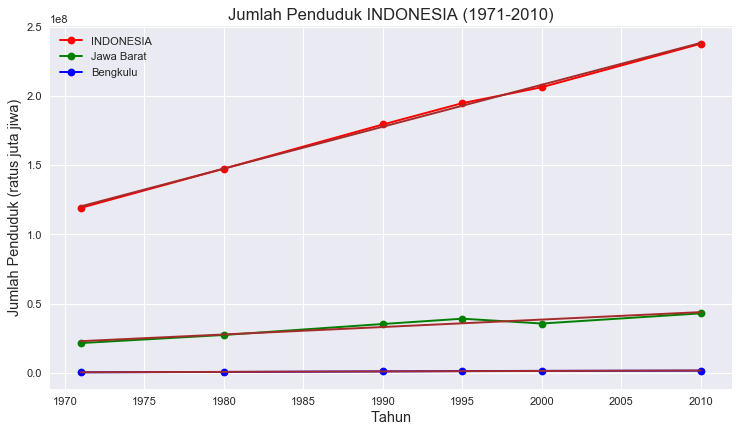

In [22]:
x = df_Indo.columns.tolist()[1:]
y1 = Data_Indo[1:]
y2 = Data_MaxProv[1:]
y3 = Data_MinProv[1:]

plt.style.use('seaborn')
plt.figure(figsize=(11,6), dpi=80)

plt.plot(x,y1,'ro-', x,y2,'go-', x,y3,'bo-')
plt.plot(df2['x'], df2['y1_pred'], 'brown')
plt.plot(df2['x'], df2['y2_pred'], 'brown')
plt.plot(df2['x'], df2['y3_pred'], 'brown')
plt.title('Jumlah Penduduk INDONESIA (1971-2010)', size='15') 
plt.xlabel('Tahun', size='13') 
plt.ylabel('Jumlah Penduduk (ratus juta jiwa)', size='13') 
plt.legend([Data_Indo[0], Data_MaxProv[0], Data_MinProv[0]], loc = 0)
plt.show()

### Prediksi Jumlah Penduduk

In [23]:
print(f'Prediksi jumlah penduduk {Data_MaxProv[0]} di tahun 2050: {int(model2.predict([[2050]]))}')
print(f'Prediksi jumlah penduduk {Data_MinProv[0]} di tahun 2050: {int(model3.predict([[2050]]))}')
print(f'Prediksi jumlah penduduk {Data_Indo[0]} di tahun 2050: {int(model1.predict([[2050]]))}')

Prediksi jumlah penduduk Jawa Barat di tahun 2050: 65443584
Prediksi jumlah penduduk Bengkulu di tahun 2050: 3139134
Prediksi jumlah penduduk INDONESIA di tahun 2050: 359273669
